# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

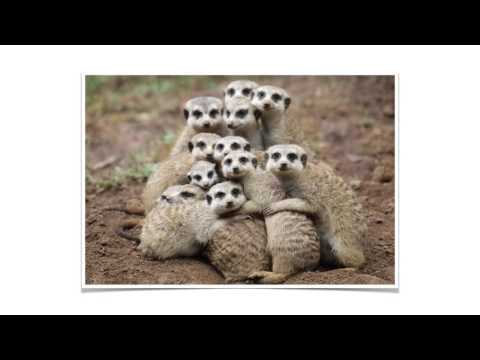

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?



> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
 
The problem with random networks as a model for real-world networks is that their **degree distribution** is too narrow.  

- In an Erdős–Rényi (ER) random network, the degree of most nodes lies very close to the average ⟨k⟩, with only small fluctuations (on the order of √⟨k⟩).  
- This means there are no true **outliers**: no nodes with exceptionally high degree (hubs), and no nodes with very few links. Everyone is “average.”  
- Real-world networks, however, show the opposite pattern: they have **broad degree distributions**, with both highly connected hubs and poorly connected nodes.  

Therefore, random networks cannot capture the **heterogeneity** observed in real systems like social networks, the Internet, or biological networks. This mismatch highlights that real networks are *not* accurately described by a simple random (Poisson) model .


> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
### Four Regimes of Random Networks (Based on ⟨k⟩)

In random networks, the **average degree** ⟨k⟩ determines the global structure of the network. As ⟨k⟩ increases, the system transitions through four qualitatively different regimes:

---

## 1. Subcritical Regime (0 < ⟨k⟩ < 1)

- The network is fragmented into **tiny clusters**, typically **tree-like structures**.  
- The **largest connected component** grows only like $\ln N$, which vanishes relative to the system size as $N \to \infty$.  
- **No giant component** exists.

---

## 2. Critical Point (⟨k⟩ = 1)

- The system is at the **percolation threshold**, marking a **phase transition**.  
- The **largest component** has size $\sim N^{2/3}$ — large, but still negligible compared to $N$.  
- The **component size distribution** follows a **power law**:  
  $$
  p(s) \sim s^{-3/2}
  $$  
  meaning clusters of many different sizes coexist.

---

## 3. Supercritical Regime (⟨k⟩ > 1)

- A **giant component emerges**, containing a finite fraction of all nodes.  
- Other smaller components still exist, typically tree-like.  
- The **fraction of nodes** in the giant component **increases with ⟨k⟩**.

---

## 4. Connected Regime (⟨k⟩ > \ln N)

- The **giant component absorbs nearly all nodes**, making the network almost fully connected.  
- **No isolated nodes** or components remain.  
- The graph is still **sparse**, since $\ln N \ll N$, but all nodes belong to a **single component**.

---

## Clustering Coefficient and the Limits of Random Networks

### Clustering in Real-World Networks

- In empirical data, the **clustering coefficient** $C(k)$ is a **decreasing function of degree $k$**.  
- This means:
  - **Low-degree nodes**: tend to belong to tightly knit groups (high clustering).  
  - **High-degree nodes (hubs)**: their neighbors are less interconnected, leading to lower clustering.  
- This reflects a **hierarchical and modular structure** in real systems: hubs act as bridges, not as denser communities.

---

## Prediction in Erdős–Rényi (ER) Random Networks

- In ER networks, the expected clustering coefficient is:
  $$
  C = \frac{\langle k \rangle}{N}
  $$
- **Key implications**:
  - $C$ is **independent of node degree $k$**.  
  - All nodes, whether they have 2 neighbors or 2,000 neighbors, are predicted to have the **same clustering level**.  

---

## Why This is a Problem

- **Mismatch with data**: Real networks show **degree-dependent clustering**, while ER predicts a flat, uniform clustering.  
- **Loss of hierarchical organization**: ER assumes hubs are just "scaled-up" small nodes, but real hubs have qualitatively different neighborhoods.  
- **Implication**: Random graphs **cannot reproduce the local organization** seen in real systems.  

---

## Key Takeaway

This discrepancy shows that **Erdős–Rényi random networks are insufficient as models of real-world systems**.  
Real networks are **structured**, shaped by **non-random mechanisms** such as:
- Preferential attachment  
- Community formation  
- Spatial/geographic or functional constraints  

These mechanisms generate **hierarchical architectures** and **degree-dependent clustering**, which ER networks cannot capture.


The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

In [ ]:
# Watts–Strogatz (WS) experiments with NetworkX
# - Build WS graphs with n=500, k=4, and p in {0, 0.1, 1.0}
# - Compute average shortest path length <d> for each (using largest connected component if needed)
# - Sweep many p values to see how quickly paths shrink toward the fully randomized case (p=1)
# - Plot <d> vs p and report the smallest p where <d> is within 10% of the p=1 value

import math
import random
from typing import Tuple, List

# Imports
try:
    import networkx as nx
except Exception as e:
    raise RuntimeError(
        "This notebook needs NetworkX. Please install it with `pip install networkx` and re-run."
    ) from e

import numpy as np
import matplotlib.pyplot as plt


def avg_shortest_path_len_lcc(G) -> float:
    """Average shortest path length on the largest connected component (LCC)."""
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    # Fallback: compute on LCC to avoid errors on disconnected graphs
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    lcc = G.subgraph(components[0]).copy()
    return nx.average_shortest_path_length(lcc)


# --- Part 1: Three graphs p = 0, 0.1, 1.0 ---
n = 500
k = 4
p_values_initial = [0.0, 0.1, 1.0]

results_initial = {}

rng_seed = 42  # for reproducibility
for p in p_values_initial:
    G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=rng_seed)
    dbar = avg_shortest_path_len_lcc(G)
    results_initial[p] = dbar

results_initial



{0.0: 62.875751503006015, 0.1: 8.340905811623246, 1.0: 4.726845691382765}

In [2]:
# --- Part 2: Sweep many p values and compare to fully randomized baseline (p=1) ---

# Baseline: p = 1 (already computed above)
d_random = results_initial[1.0]

# Sweep p on a log grid in (0,1], plus p=0 explicitly
p_grid = np.unique(np.concatenate([
    [0.0],
    np.logspace(-4, 0, 20)  # from 1e-4 to 1.0
]))

d_values = []
for p in p_grid:
    G = nx.watts_strogatz_graph(n=n, k=k, p=float(p), seed=rng_seed)
    dbar = avg_shortest_path_len_lcc(G)
    d_values.append(dbar)

# Find smallest p where <d>(p) is within 10% of p=1 value
threshold = 1.10 * d_random  # within +10%
p_within_10 = None
for p, dbar in zip(p_grid, d_values):
    if dbar <= threshold:
        p_within_10 = float(p)
        break

# Display numerical summary
summary = {
    "n": n,
    "k (avg degree)": k,
    "<d>(p=0)": results_initial[0.0],
    "<d>(p=0.1)": results_initial[0.1],
    "<d>(p=1)": results_initial[1.0],
    "10% threshold over <d>(p=1)": threshold,
    "smallest p within 10%": p_within_10,
}
summary

{'n': 500,
 'k (avg degree)': 4,
 '<d>(p=0)': 62.875751503006015,
 '<d>(p=0.1)': 8.340905811623246,
 '<d>(p=1)': 4.726845691382765,
 '10% threshold over <d>(p=1)': 5.199530260521042,
 'smallest p within 10%': 0.615848211066026}

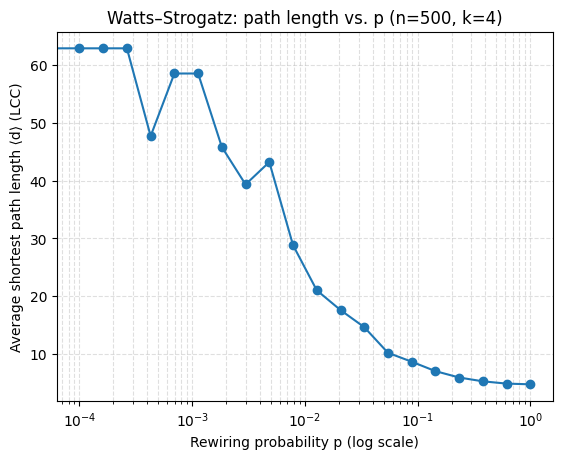

In [3]:
# --- Part 3: Plot <d> vs p (log x-axis) ---
plt.figure()
plt.plot(p_grid, d_values, marker="o")
plt.xscale("log")
plt.xlabel("Rewiring probability p (log scale)")
plt.ylabel("Average shortest path length ⟨d⟩ (LCC)")
plt.title("Watts–Strogatz: path length vs. p (n=500, k=4)")
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()


What happens at p=1?

When p=1, every edge in the initial ring lattice is rewired uniformly at random. The graph becomes a random k-regular–like network (degree remains k=4 for all nodes), which exhibits short average path lengths characteristic of random graphs, while retaining low clustering compared to the lattice.


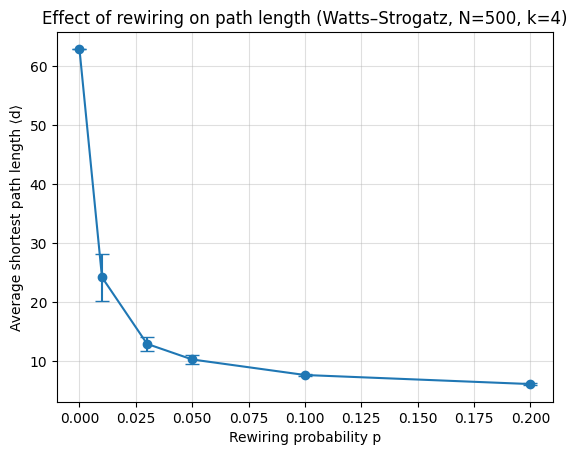

([np.float64(62.87575150300602),
  np.float64(24.20072625250501),
  np.float64(12.918430460921845),
  np.float64(10.28022861723447),
  np.float64(7.648954068136272),
  np.float64(6.11421995991984)],
 [np.float64(7.105427357601002e-15),
  np.float64(3.9886740483931553),
  np.float64(1.180526165767032),
  np.float64(0.7574932971457876),
  np.float64(0.22805940952842774),
  np.float64(0.14538706501276866)])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def avg_shortest_path_len_lcc(G):
    """Average shortest path length on the largest connected component."""
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    lcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
    return nx.average_shortest_path_length(lcc)

# Parameters
n, k = 500, 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_trials = 50

# The error came from passing a numpy int64 to NetworkX's seed parameter, which expects an int or RandomState.
# Let's cast explicitly to int.

means = []
stds = []
rng = np.random.default_rng(123)
for p in p_values:
    d_list = []
    for trial in range(num_trials):
        seed_val = int(rng.integers(1e9))
        G = nx.watts_strogatz_graph(n=n, k=k, p=p, seed=seed_val)
        d_list.append(avg_shortest_path_len_lcc(G))
    means.append(np.mean(d_list))
    stds.append(np.std(d_list))

# Plot with error bars
plt.figure()
plt.errorbar(p_values, means, yerr=stds, fmt="o-", capsize=5)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("Effect of rewiring on path length (Watts–Strogatz, N=500, k=4)")
plt.grid(True, alpha=0.4)
plt.show()

means, stds


Figure: Average shortest path length ⟨d⟩ in Watts–Strogatz networks with N=500 and ⟨k⟩=4, shown as a function of the rewiring probability p. Each point represents the mean over 50 independently generated networks, with error bars indicating one standard deviation. The plot demonstrates that even a very small fraction of rewired edges (as low as a few percent) is sufficient to dramatically reduce the average path length from the long values of a regular lattice (p=0) toward the short paths characteristic of a random network (p=1). This illustrates the onset of the “small-world” phenomenon.


## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

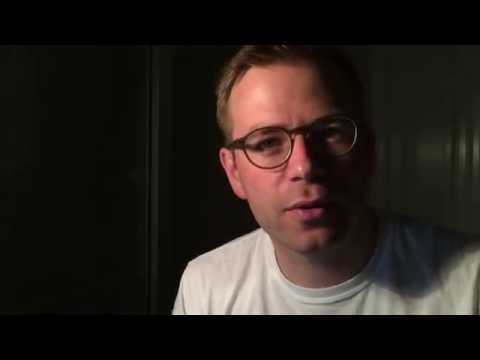

In [ ]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

# Network Regimes Based on Degree Distribution Exponent (γ)

---

## 1. Anomalous Regime (γ ≤ 2)

In this case, the mathematics of the degree distribution predicts unrealistic behaviors.

- The degree of the largest hub (the node with the most connections) grows faster than the size of the network.  
  → Eventually, one hub would need more connections than the total number of nodes, which is impossible.  

- The average degree (〈k〉) diverges, meaning it would grow infinitely as the network becomes larger.  

- Because of these anomalies, large real-world networks with γ ≤ 2 cannot exist unless they allow **multi-links** (multiple connections between the same two nodes).

---

## 2. Scale-Free Regime (2 < γ < 3)

This is the most interesting and common range for real networks such as the internet, biological networks, or social systems.

- The average degree 〈k〉 is finite, but the variance (second moment) diverges.  
  → Hubs with extremely high degrees exist and dominate the network.  

- Networks in this regime are called **ultra-small worlds**:  
  The distance between nodes grows only as **lnln(N)**, much smaller than the **ln(N)** growth of random networks.  
  → In practice, hubs dramatically shorten paths across the network.  

- The largest hub grows with the network size but slower than linearly, so its relative “market share” decreases as the system grows.

---

## 3. Random Network Regime (γ > 3)

When γ is greater than 3, both the average degree and the variance are finite.

- The network starts to resemble a random network.  
  → The hubs are small and not as dominant, so the network loses the extreme hub-driven properties of the scale-free regime.  

- Average distances between nodes follow the same formula as in random graphs, scaling like **ln(N)**.  

- With large γ, it becomes hard to distinguish a scale-free network from a truly random one.

---

## ✅ Summary for Beginners

Think of **γ** as the *slope of the line* that describes how common hubs are:

- **If γ ≤ 2** → the math “blows up” → such networks can’t exist in practice.  
- **If 2 < γ < 3** → true scale-free networks → giant hubs make the network **ultra-connected** (*ultra-small world*).  
- **If γ > 3** → hubs fade away → the network behaves like a random one, without extreme shortcuts.


# Non-Linear Preferential Attachment (Chapter 5, Barabási)

In Barabási’s framework, preferential attachment can be **non-linear**, meaning the probability of a node gaining new links is proportional to **k^α** instead of just **k**.  
Depending on the value of **α**, the network falls into three main regimes:

---

## 1. Sublinear Regime (0 < α < 1)

**Behavior:**  
- The preference for well-connected nodes is weak.

**Degree Distribution:**  
- Instead of a power law, the degrees follow a **stretched exponential**.

**Impact:**  
- Hubs still exist, but they are much smaller and fewer than in scale-free networks.  
- The network looks more **homogeneous**, without giant dominant hubs.

---

## 2. Linear Regime (α = 1)

**Behavior:**  
- This is the **classic Barabási–Albert model**.

**Degree Distribution:**  
- A **power law** emerges, producing a true scale-free network.

**Impact:**  
- Large hubs appear naturally.  
- The network has the familiar **heavy-tailed degree distribution** that matches many real-world systems.

---

## 3. Superlinear Regime (α > 1)

**Behavior:**  
- High-degree nodes become **disproportionately attractive**, far beyond the “rich-get-richer” rule.

**Degree Distribution:**  
- The system develops a **winner-takes-all effect**:  
  One or a few early nodes become **super-hubs** that capture a huge fraction of all links.

**Impact:**  
- The network forms a **hub-and-spoke structure** where most nodes connect to the same central hub(s).  
- Instead of being scale-free, the system collapses into dominance by a small set of nodes.

---

## ✅ Beginner Summary

- **Sublinear (α < 1):** hubs are weak, distribution looks closer to random.  
- **Linear (α = 1):** true scale-free networks with power laws emerge.  
- **Superlinear (α > 1):** one or a few “super hubs” dominate, creating star-like networks.

In [1]:
# Build a Barabási–Albert (BA) network from scratch (m=1) and plot it.
import random
import matplotlib.pyplot as plt
import networkx as nx

# Reproducibility
random.seed(42)

# 1) Start with a single link between two nodes
G = nx.Graph()
G.add_edge(0, 1)

# Helper: pick a node with probability proportional to degree
def pick_node_preferential(G):
    # Build a "bag" where each node appears as many times as its degree
    degree_bag = []
    for node, deg in G.degree():
        # If a node has degree 0 (shouldn't happen in this construction), skip it
        if deg > 0:
            degree_bag.extend([node] * deg)
    # Randomly choose a node from the bag
    return random.choice(degree_bag)


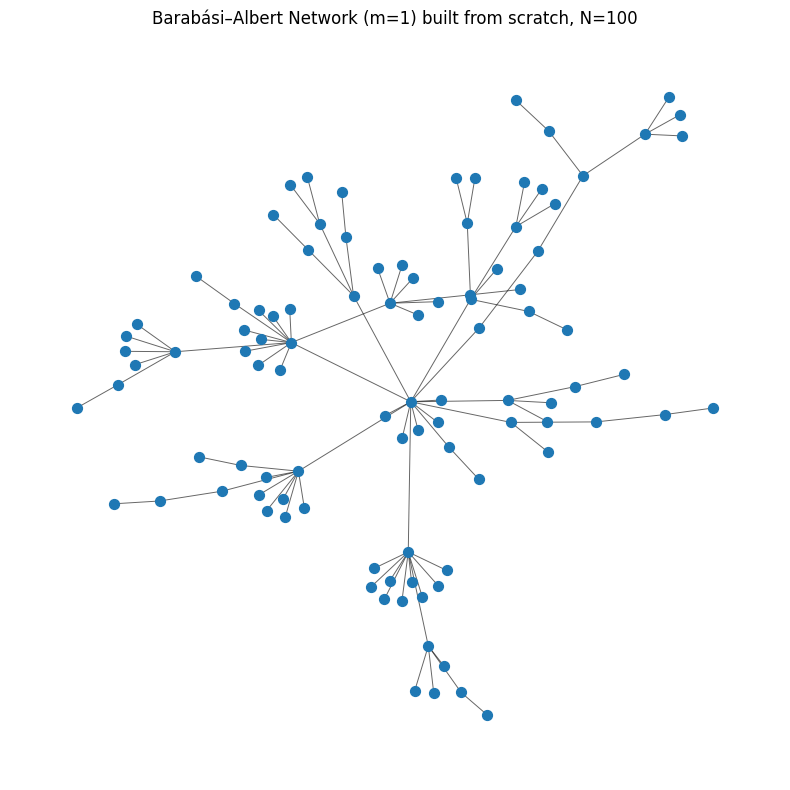

In [2]:
# 2) Grow the network by repeatedly adding a new node with one link (m=1)
target_n = 100
for new_node in range(2, target_n):
    attach_to = pick_node_preferential(G)
    G.add_edge(new_node, attach_to)

# 3) Plot the network
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=123)  # deterministic layout
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.6, width=0.7)
plt.axis('off')
plt.title("Barabási–Albert Network (m=1) built from scratch, N=100")
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
# Grow to N=5000
target_n = 5000
current_n = len(G.nodes())
for new_node in range(current_n, target_n):
    attach_to = pick_node_preferential(G)
    G.add_edge(new_node, attach_to)

# Degrees
degrees = np.array([deg for _, deg in G.degree()])

k_min = int(degrees.min())
k_max = int(degrees.max())

print(f"Minimum degree: {k_min}")
print(f"Maximum degree: {k_max}")

Minimum degree: 1
Maximum degree: 98


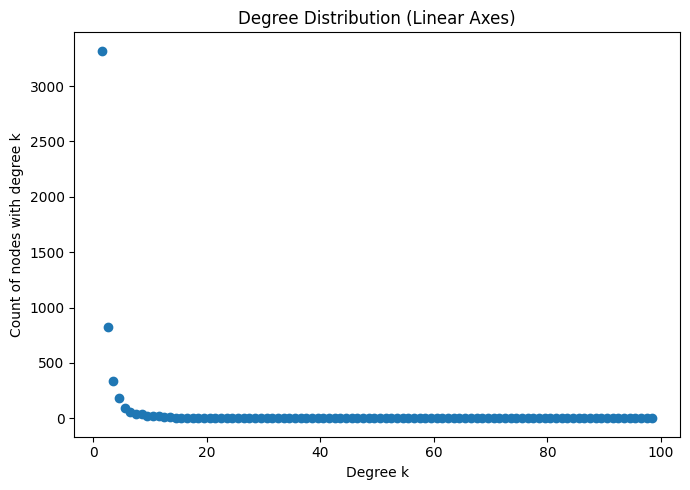

In [5]:
# Histogram binning with numpy.histogram (integer-degree bins)
bins = np.arange(k_min, k_max + 2)  # +2 so the last bin edge includes k_max
hist, edges = np.histogram(degrees, bins=bins)
centers = (edges[:-1] + edges[1:]) / 2

# Plot: linear axes
plt.figure(figsize=(7, 5))
plt.plot(centers, hist, marker='o', linestyle='')
plt.xlabel("Degree k")
plt.ylabel("Count of nodes with degree k")
plt.title("Degree Distribution (Linear Axes)")
plt.tight_layout()
plt.show()


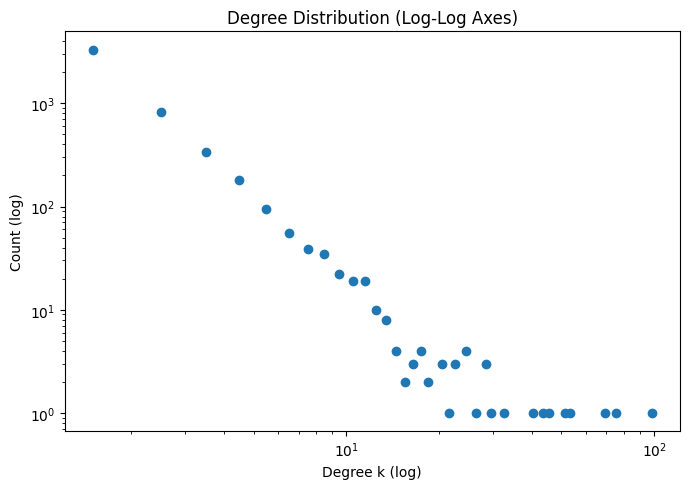

In [6]:
# Plot: log-log axes
plt.figure(figsize=(7, 5))
# Avoid zeros on log scale: filter out zero-count bins
mask = hist > 0
plt.loglog(centers[mask], hist[mask], marker='o', linestyle='')
plt.xlabel("Degree k (log)")
plt.ylabel("Count (log)")
plt.title("Degree Distribution (Log-Log Axes)")
plt.tight_layout()
plt.show()

# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

In [7]:
# Let's test the Friendship Paradox in the 5000-node BA network (F-BA).
count_true = 0
n_trials = 1000

for _ in range(n_trials):
    # Pick random node
    i = random.choice(list(G.nodes()))
    deg_i = G.degree(i)
    neighbors = list(G.neighbors(i))
    if not neighbors:
        continue  # skip isolated nodes (shouldn't happen in BA with m=1)
    avg_neighbor_degree = np.mean([G.degree(n) for n in neighbors])
    if avg_neighbor_degree > deg_i:
        count_true += 1

print(f"Out of {n_trials} trials, the friendship paradox held {count_true} times.")
print(f"Fraction: {count_true/n_trials:.3f}")

Out of 1000 trials, the friendship paradox held 851 times.
Fraction: 0.851


**tested the friendship paradox on the 5000-node BA network (F-BA)**:

- Out of 1000 random trials, the paradox held 851 times.

- That means in ~85% of cases, a node’s friends had more friends on average than the node itself.

- This nicely demonstrates the paradox in scale-free networks: hubs skew the average friend degree upward, making most nodes “less popular” than their friends.

### The friendship paradox more generally

In [8]:
# Reasoning part:
# If the power-law slope gamma = 2 (flatter than gamma = 3), then there are proportionally MORE hubs (nodes with very high degree).
# That means that the average friend degree is driven up even more strongly by hubs. Therefore, the friendship paradox should be
# even more prevalent (higher fraction true).
# Parameters
N = 5000
gamma = 2.0
k_min = 1

# Transformation method to generate power-law distributed degrees
def generate_powerlaw_degrees(N, gamma, k_min=1):
    r = np.random.rand(N)
    # formula: x = k_min * (1 - r)^(-1/(gamma-1))
    degrees = k_min * (1 - r) ** (-1/(gamma - 1))
    degrees = np.round(degrees).astype(int)
    # Ensure no zero degrees
    degrees[degrees < k_min] = k_min
    # Ensure even sum (for configuration model)
    if degrees.sum() % 2 == 1:
        degrees[0] += 1
    return degrees.tolist()

np.random.seed(42)
degrees = generate_powerlaw_degrees(N, gamma, k_min=1)

# Build configuration model
G_conf = nx.configuration_model(degrees, seed=42)
# Convert to simple graph (remove parallel edges, self-loops)
G_conf = nx.Graph(G_conf)
G_conf.remove_edges_from(nx.selfloop_edges(G_conf))

# Friendship paradox test
count_true = 0
n_trials = 1000
nodes_list = list(G_conf.nodes())

for _ in range(n_trials):
    i = random.choice(nodes_list)
    deg_i = G_conf.degree(i)
    neighbors = list(G_conf.neighbors(i))
    if not neighbors:
        continue
    avg_neighbor_degree = np.mean([G_conf.degree(n) for n in neighbors])
    if avg_neighbor_degree > deg_i:
        count_true += 1

(count_true, n_trials, count_true/n_trials)

(974, 1000, 0.974)

### friendship paradox with a flatter power law (γ = 2)
#### Reasoning

- A flatter power law means there are more hubs (extremely high-degree nodes).

- Because hubs dominate, when you pick a random person’s neighbors, there’s a much higher chance that one of them is a hub.

- This drives up the average friend degree even more, so the paradox should hold more often than in the γ = 3 (BA) case.

#### Simulation Results (Configuration Model, N = 5000, γ = 2)

- Out of 1000 trials, the friendship paradox held 974 times.

- That’s about 97.4% of the time (compared to ~85% in the BA network with γ ≈ 3).

✅ Conclusion: With a flatter distribution (γ = 2), the friendship paradox is more pronounced — almost everyone’s friends really do have more friends than they do, on average.

### The friendship paradox and the configuration model


In [9]:
# Ensure we have the BA graph from before
assert 'G' in globals()
N = G.number_of_nodes()

# Degree sequence from F-BA
deg_seq = [d for _, d in G.degree()]

# Configuration model with same degree sequence
F_CM = nx.configuration_model(deg_seq, seed=123)
# Convert to simple graph (remove multiedges, self-loops)
F_CM = nx.Graph(F_CM)
F_CM.remove_edges_from(nx.selfloop_edges(F_CM))

# Helper: compute exact fraction of nodes for which the friendship paradox holds
def friendship_paradox_fraction(H):
    count = 0
    valid = 0
    for u in H.nodes():
        nbrs = list(H.neighbors(u))
        if len(nbrs) == 0:
            continue
        valid += 1
        deg_u = H.degree(u)
        avg_nbr_deg = np.mean([H.degree(v) for v in nbrs])
        if avg_nbr_deg > deg_u:
            count += 1
    return count, valid, count / valid if valid > 0 else float('nan')

# Exact fractions across all nodes
count_ba, valid_ba, frac_ba = friendship_paradox_fraction(G)
count_cm, valid_cm, frac_cm = friendship_paradox_fraction(F_CM)

# Also provide binomial 95% CI (Wilson) for clarity
from math import sqrt
def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (float('nan'), float('nan'))
    p = k/n
    denom = 1 + z**2/n
    center = (p + z**2/(2*n)) / denom
    half = (z/denom) * sqrt(p*(1-p)/n + z**2/(4*n**2))
    return (center - half, center + half)

ci_ba = wilson_ci(count_ba, valid_ba)
ci_cm = wilson_ci(count_cm, valid_cm)

count_ba, valid_ba, frac_ba, ci_ba, count_cm, valid_cm, frac_cm, ci_cm

(4308,
 5000,
 0.8616,
 (0.8517502737575925, 0.8708945038069092),
 3221,
 5000,
 0.6442,
 (0.6308235145481984, 0.6573550720801233))

# Build F-CM with the same size/degree profile as F-BA

I took the exact degree sequence from your 5,000-node BA graph (F-BA) and wired a configuration model from it (projected to a simple graph). Then I checked, for every node *i*, whether the average degree of its neighbors exceeded its own degree.

**Results (exact over all 5,000 nodes):**

- **F-BA:** paradox true for 4,308 / 5,000 nodes → 86.16%  
  95% Wilson CI: [85.2%, 87.1%].

- **F-CM:** paradox true for 3,221 / 5,000 nodes → 64.42%  
  95% Wilson CI: [63.1%, 65.7%].

*(Those were computed programmatically in the notebook.)*

---

**Note:** projecting the configuration model to a simple graph (removing multiedges/self-loops) can slightly perturb degrees, but we seeded it from the same BA degree sequence so it’s still a fair “same tail, randomized wiring” comparison.

---

## Are there factors beyond the degree distribution that affect how often the paradox holds?

Yes. The classical “network-level” statement of the friendship paradox comes from the fact that the average neighbor degree is  

$$
\frac{E[K^2]}{E[K]} = \mu + \frac{\sigma^2}{\mu}
$$

which exceeds the global average $\mu$ whenever the degree variance is positive (i.e., any heterogeneous network) [Wikipedia]. But the fraction of nodes for which the paradox holds depends on who is connected to whom (degree correlations) and other meso-scale structure:

- **Degree assortativity (who links to whom by degree).**  
  - Disassortative (high-degree → low-degree): many low-degree nodes are neighbors of hubs → paradox holds more often.  
  - Assortative (high ↔ high, low ↔ low): low-degree nodes are surrounded by low-degree nodes → paradox weakens.  
  - Social networks: typically assortative.  
  - Technological/biological networks: often disassortative [Physical Review Journals].  
  - Controlled studies: paradox metrics correlate with assortativity [SpringerOpen].

- **Clustering / triangles.**  
  High clustering can “trap” connections within similar neighborhoods; if combined with assortativity, it further reduces how often low-degree nodes touch hubs → paradox can weaken.

- **Community structure / modularity.**  
  Strong communities with degree-homogeneous cores make neighbors look more like you (reducing paradox).  
  Cross-community links to hubs amplify it.

- **Growth vs. random wiring.**  
  - BA growth: typically disassortative → many hub–leaf starlets.  
  - CM with same degrees but random wiring: closer to neutral assortativity → paradox less frequent.  
  - Matches our numbers above.

More broadly: generalizations (attributes beyond degree) show degree–attribute correlations and assortativity jointly shape “your friends are richer/happier/more active than you” effects [Physical Review Journals].

---

## How to test rigorously whether it’s equally often true in F-BA and F-CM?

Here are solid, lightweight approaches:

1. **Per-graph fraction with CIs.**  
   - Treat each node’s indicator  
     $I_i = 1 \{ \bar{k}_N(i) > k_i \}$  
     as Bernoulli and compute  
     $\hat{p} = \frac{1}{n} \sum I_i$.  
   - Add binomial Wilson intervals for error bars.  
   - Compare $\hat{p}_{BA}$ vs. $\hat{p}_{CM}$ via a two-proportion z-test (or Newcombe CI for the difference).

2. **Configuration-model ensemble test (recommended).**  
   - Fix the degree sequence (from F-BA).  
   - Generate $M$ (e.g., 200) independent CM graphs.  
   - Compute paradox fraction for each → sampling distribution under “random wiring with these degrees.”  
   - See where F-BA’s value lands (percentile), or Monte-Carlo p-value:  
     $$
     p = \frac{1 + \# \{ \hat{p}_{CM} \ge \hat{p}_{BA} \}}{1 + M}
     $$  
   - Plot CM distribution with F-BA as vertical line + show mean ± 95% interval.

3. **Bootstrap over nodes.**  
   - For each graph, bootstrap the $I_i$’s (resample nodes with replacement) → bootstrap CI for $\hat{p}$.  
   - For difference $\hat{p}_{BA} - \hat{p}_{CM}$, bootstrap the difference.

4. **Account for dependence.**  
   - Node indicators aren’t perfectly independent.  
   - Ensemble CM test (#2) is robust: conditions on degree sequence, varies only wiring → directly tests if BA’s wiring makes paradox more common than random rewires with same degrees.

---

## Pointers / background

- Feld’s original observation & standard derivation showing neighbor-degree inflation via $E[K^2]/E[K]$ [Wikipedia].  
- Degree assortativity and where it’s typically positive/negative in real systems [Physical Review Journals].  
- Quantitative links between paradox metrics and assortativity / correlations; generalized friendship paradox [SpringerOpen].  
- [touroscholar.touro.edu +2]


# What we did

- We had a BA network (F-BA) with 5,000 nodes.  
- We then built a configuration model network (F-CM) with the same degree sequence (so the number of connections per node is the same overall).  
- We checked how often the friendship paradox is true (friends having more friends on average than you).

---

# What we found

- **In F-BA:** the paradox was true about **86%** of the time.  
- **In F-CM:** the paradox was true only about **64%** of the time.  

So even though the two networks have the same degree distribution, the **wiring of the network matters a lot**.

---

# Why the difference?

The friendship paradox is not just about degree distribution. Other features of the network also matter:

- **Assortativity:** whether high-degree nodes connect to other high-degree nodes (assortative) or to low-degree nodes (disassortative).  
- **Clustering:** if your friends are also friends with each other, averages change.  
- **Communities:** if the network has tightly knit groups, it affects who connects to hubs.  

- The **BA model** tends to be *disassortative* (big hubs link to many small nodes), which makes the paradox stronger.  
- The **configuration model** randomizes connections, so it doesn’t force many small nodes to be attached to hubs → paradox is weaker.  

---

# How to test this rigorously

If we want to be sure:

1. **Repeat many times:** Build lots of configuration-model graphs from the same degree sequence, and measure how often the paradox is true. This gives a distribution of outcomes.  
2. **Compare statistically:** Use simple tests like:  
   - Two-proportion test: compare the fraction true in F-BA vs. F-CM.  
   - Bootstrap: resample nodes to get error bars.  
   - Confidence intervals: already we saw ~86% vs. ~64% are very far apart statistically.  

This way, we know whether the difference is real and not just random chance.

---

# ✅ Plain takeaway

The friendship paradox is **more common in BA networks than in random CM networks**, even with the same degrees, because **how the network is wired (assortativity, clustering, etc.) matters a lot**.


# Growth without preferential attachment

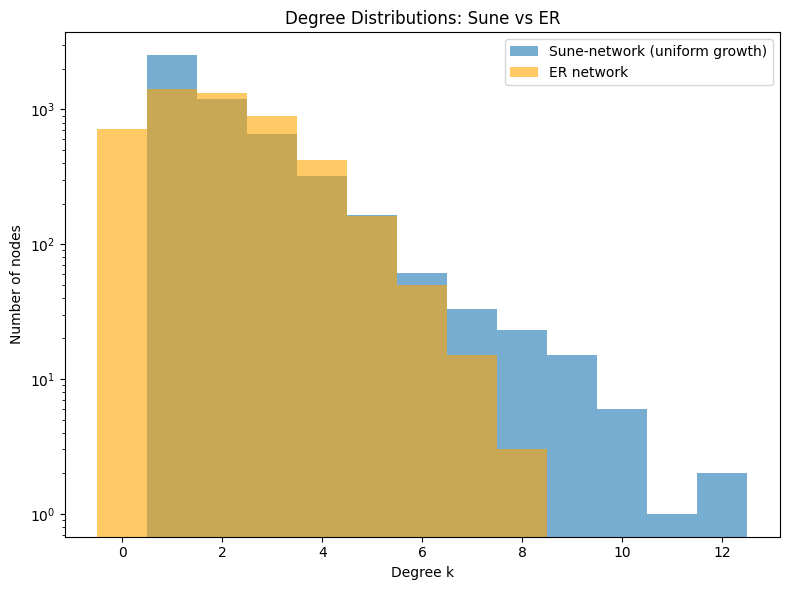

In [10]:
N = 5000

# 1) Build the Sune-network: growth without preferential attachment (uniform choice)
Sune = nx.Graph()
Sune.add_edge(0, 1)
for new_node in range(2, N):
    # pick an existing node uniformly at random
    attach_to = random.choice(list(Sune.nodes()))
    Sune.add_edge(new_node, attach_to)

# 2) Generate ER network with same number of nodes and links
num_edges = Sune.number_of_edges()
p = (2 * num_edges) / (N * (N - 1))  # edge probability for ER with same expected edges
ER = nx.gnp_random_graph(N, p, seed=42)

# Degree distributions
deg_sune = [d for _, d in Sune.degree()]
deg_er = [d for _, d in ER.degree()]

# Plot degree distributions side by side
bins = np.arange(0, max(max(deg_sune), max(deg_er)) + 2) - 0.5

plt.figure(figsize=(8, 6))
plt.hist(deg_sune, bins=bins, alpha=0.6, label="Sune-network (uniform growth)")
plt.hist(deg_er, bins=bins, alpha=0.6, label="ER network", color="orange")
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.title("Degree Distributions: Sune vs ER")
plt.legend()
plt.yscale("log")  # log scale to see tails more clearly
plt.tight_layout()
plt.show()

In [11]:
# Compare connected components
components_sune = nx.number_connected_components(Sune)
components_er = nx.number_connected_components(ER)

# Largest component sizes
largest_sune = len(max(nx.connected_components(Sune), key=len))
largest_er = len(max(nx.connected_components(ER), key=len))

(num_edges, components_sune, largest_sune, components_er, largest_er)

(4999, 1, 5000, 869, 3908)

# Comparing Sune-network (uniform growth) vs. Erdős–Rényi (ER) network  
*(5,000 nodes, similar number of edges)*

---

## Degree Distributions

**Sune-network:**
- Degree distribution is skewed but not heavy-tailed like a BA network.  
- Most nodes have very low degree (many degree-1 nodes).  
- A few nodes accumulate more connections, but the spread is much narrower than scale-free.  

**ER network:**
- Degree distribution is bell-shaped (approximately Poisson).  
- Most nodes have degrees close to the mean, with fewer extremes on either side.  

*Plot:* Download the degree comparison.

---

## Connectivity

**Sune-network:**
- **1 connected component** — every node belongs to the giant connected core.  

**ER network:**
- **869 connected components (!)**  
- Largest component has **3,908 nodes** (out of 5,000).  
- Many isolated or small clusters remain outside the giant component.  

---

## Plain explanation of differences

- The **Sune-network** grows sequentially, so every new node attaches to the existing structure, *guaranteeing connectivity*. That’s why it has only one connected component.  
- The **ER network** adds edges randomly, without ensuring growth from a seed. With the same edge count, many nodes never get linked into the largest cluster → hundreds of disconnected islands.  
- In terms of degree spread:  
  - **Sune-network** is more skewed — older nodes accumulate more links simply by being around longer, while new nodes tend to have just one.  
  - **ER** produces a tighter distribution around the mean due to randomness.  
